<div style="border: 3px dotted white; padding: 5px; margin-right: auto;  width: 80%;"> ✍ В этом модуле мы обсудим глобальную тему современности — новую коронавирусную инфекцию (Covid-19).</div>

Мы будем изучать методы визуализации, используя два набора данных:

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">1</div>
covid_data — данные о показателях заболеваемости за каждый день в различных регионах 187 стран. (источник данных)
 </div>

In [2]:
import pandas as pd

# covid_data = pd.read_csv('data/covid_data.csv')display(covid_data.head())
url = (
    "https://drive.google.com/file/d/1qdw4SOgyjvtVzVvXda-uchUes5R1BgJN/view?usp=sharing"
)
url = "https://drive.google.com/uc?id=" + url.split("/")[-2]
covid_data = pd.read_csv(url)
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Мы будем работать со следующими столбцами:
- date — дата наблюдения;
- province/state — наименование провинции/штата;
- country — наименование страны;
- confirmed — общее число зафиксированных случаев на указанный день;
- deaths — общее число зафиксированных смертей на указанный день;
- recovered — общее число выздоровлений на указанный день.


<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">2</div>
country_vaccinations — данные о процессе вакцинирования людей в 221 стране мира. (источник данных)
 </div>

<div style="background-color: #e0ffd1;color: black;border: 3px solid black; padding: 15px; margin-right: 500px; width: 80%;">Обратите внимание, что в приведённом источнике данные о вакцинации постоянно обновляются. В данном модуле будет использоваться файл, который мы скачали заранее.</div>

In [3]:
# vaccinations_data = pd.read_csv('data/country_vaccinations.csv')

url = (
    "https://drive.google.com/file/d/1DkGuwu6XxIBDSxczVY8qqg24NiQlQVTW/view?usp=sharing"
)
url = "https://drive.google.com/uc?id=" + url.split("/")[-2]
vaccinations_data = pd.read_csv(url)
vaccinations_data = vaccinations_data[
    [
        "country",
        "date",
        "total_vaccinations",
        "people_vaccinated",
        "people_vaccinated_per_hundred",
        "people_fully_vaccinated",
        "people_fully_vaccinated_per_hundred",
        "daily_vaccinations",
        "vaccines",
    ]
]
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Данная таблица содержит следующие столбцы:

- country — наименование страны;
- date — дата наблюдения;
- total_vaccinations — общее число введённых вакцин в стране на указанный день;
- people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
- people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как people_vaccinated/population*100);
- people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
- people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как people_fully_vacinated/population*100);
- daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
- vaccines — комбинации вакцин, используемые в стране.

## Немного об особенностях данных

В таблице covid_data данные о заболеваемости представлены для каждого региона (штата) страны за каждый день. Например, для США (United States) записи за 29 мая 2021 года имеют вид:

In [4]:
covid_data[
    (covid_data["country"] == "United States") & (covid_data["date"] == "05/29/2021")
].head()

,date,province/state,country,confirmed,deaths,recovered
305842,05/29/2021,Alabama,United States,543405.0,11146.0,0.0
305844,05/29/2021,Alaska,United States,70208.0,369.0,0.0
305869,05/29/2021,Arizona,United States,880466.0,17628.0,0.0
305870,05/29/2021,Arkansas,United States,341290.0,5830.0,0.0
305913,05/29/2021,California,United States,3788713.0,63236.0,0.0


В таблице vaccinations_data параметры вакцинирования отображены для всех стран на каждый день, без учёта регионов. Вот часть таблицы для тех же Соединённых Штатов за 29 мая 2021 года. Как видите, она всего одна:

In [5]:
vaccinations_data[
    (vaccinations_data["country"] == "United States")
    & (vaccinations_data["date"] == "2021-05-29")
]

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
41038,United States,2021-05-29,293705050.0,167157043.0,49.7,134418748.0,39.97,1394832.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


В данных много пропусков, а также неверно введённых значений. Например, для США (United States) и Великобритании (United Kingdom) в большинстве записей таблицы covid_data число выздоровевших людей равно 0. В данном модуле мы закроем на это глаза, но вообще эти страны подлежали бы исключению из данных или нам понадобился бы дополнительный источник данных, из которого мы смогли бы получить недостающую информацию.

<div style="background-color: #e0ffd1;color: black;border: 3px solid black; padding: 15px; margin-right: 500px; width: 80%;">Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.</div>

Возникает большое желание объединить таблицы. Для этого необходимо учитывать следующие нюансы:

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">1</div>
В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.
 </div>

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">2</div>
В таблицах не совпадает число стран, а иногда и их названия. <br>
При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако это не является темой данного модуля.
 </div>

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">3</div>
Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.
 </div>

## Предобработка данных

Опираясь на замечания выше, выполним небольшую предобработку.

В таблице covid_data:

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">1</div>
Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:
 </div>

In [6]:
covid_data = covid_data.groupby(["date", "country"], as_index=False)[
    ["confirmed", "deaths", "recovered"]
].sum()

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">2</div>
Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
 </div>

In [7]:
covid_data["date"] = pd.to_datetime(covid_data["date"])

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">3</div>
Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
 </div>

In [8]:
covid_data["active"] = (
    covid_data["confirmed"] - covid_data["deaths"] - covid_data["recovered"]
)

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
<div style="color: white;background-color: black;">4</div>
Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
 </div>

In [9]:
covid_data = covid_data.sort_values(by=["country", "date"])
covid_data["daily_confirmed"] = covid_data.groupby("country")["confirmed"].diff()
covid_data["daily_deaths"] = covid_data.groupby("country")["deaths"].diff()
covid_data["daily_recovered"] = covid_data.groupby("country")["recovered"].diff()

Итоговый вид таблицы covid_data:

In [10]:
covid_data.sample(5)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
86449,2020-12-30,Ecuador,211512.0,14023.0,184507.0,12982.0,1186.0,22.0,0.0
35971,2020-05-05,Belgium,50509.0,8016.0,12441.0,30052.0,242.0,92.0,63.0
73893,2020-10-26,Botswana,6283.0,21.0,4438.0,1824.0,360.0,0.0,3511.0
19531,2021-03-22,Gabon,18078.0,108.0,15654.0,2316.0,367.0,2.0,159.0
24124,2021-04-03,Timor-Leste,714.0,0.0,267.0,447.0,37.0,0.0,51.0


В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [11]:
vaccinations_data["date"] = pd.to_datetime(vaccinations_data["date"])

<div style="border: 3px dotted white; padding: 5px; margin-right: auto;  width: 80%;"> ✍ Итак, мы произвели некоторую предобработку данных. Дальнейшее объединение таблиц остаётся за вами (обязательно выполните задания ниже, прежде чем двигаться дальше).</div>

###  Задание 3.1

За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД 

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
Подсказка (1 из 1): Для определения периода можно найти максимум и минимум в столбце date таблицы covid_data.
</code>
</details>

In [12]:
print(covid_data["date"].min(), covid_data["date"].max())

2020-01-22 00:00:00 2021-05-29 00:00:00


###  Задание 3.2

За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД 

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
Подсказка (1 из 1): Для определения интервала даты можно найти максимум и минимум в столбца date таблицы vaccination_data.
</code>
</details>

In [13]:
print(vaccinations_data["date"].min(), vaccinations_data["date"].max())

2020-12-02 00:00:00 2021-09-06 00:00:00


###  Задание 3.3

С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.

Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

Сохраните таблицу covid_df — она понадобится нам в следующем юните.
Сколько строк и столбцов в таблице covid_df?

Введите ответ в виде двух чисел через дефис (например, 333-33): первое число — количество строк, второе число — количество столбцов.

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
Подсказка (1 из 1): Для объединения по нескольким столбцам передайте в параметр метода merge() список с именами ключей.
</code>
</details>

In [24]:
covid_df = covid_data.merge(vaccinations_data, how="left", on=["date", "country"])
covid_df.shape

(86785, 16)

<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.</div>

In [25]:
covid_df["death_rate"] = covid_df["deaths"] / covid_df["confirmed"] * 100
covid_df["recover_rate"] = covid_df["recovered"] / covid_df["confirmed"] * 100
%store covid_df

Stored 'covid_df' (DataFrame)


###   Задание 3.4

Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
7.19
</code>
</details>

In [16]:
round(
    covid_df[covid_df["country"] == "United States"]
    .groupby("country")["death_rate"]
    .max(),
    2,
)

country
United States    7.19
Name: death_rate, dtype: float64

###    Задание 3.5

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
67.06
</code>
</details>

In [17]:
round(covid_df[covid_df["country"] == "Russia"]["recover_rate"].mean(), 2)

67.06


<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
✍ Дальнейшая работа будет проводиться с таблицей covid_df — результатом объединения таблиц covid_data и vaccinations_data.

Оказывается, за способами визуализации данных не нужно далеко ходить. Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas. Функционал для создания основных типов графиков уже включён в библиотеку. С изучения возможностей Pandas мы и начнём наше погружение в программную визуализацию.
</div>

<div style="background-color: #e0ffd1;color: black;border: 3px solid black; padding: 15px; margin-right: 500px; width: 80%;"><b>Примечание.</b> Для визуализации Pandas использует библиотеку matplotlib, о которой мы поговорим в следующем юните. Если попробовать воспользоваться методами визуализации Pandas без предварительной установки matplotlib, вы получите ошибку ImportError. Для установки библиотеки используется стандартная команда, которую нужно выполнить в терминале: pip install matplotlib </div>

# Базовая визуализация в Pandas

Основным методом для создания простейших графиков в Pandas является <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html">plot().</a>

## Основные параметры метода plot()



- x — название признака, который будет отложен по оси абсцисс;
- y — название признака, который будет отложен по оси ординат;
- figsize — размер графика (кортеж из ширины и высоты в дюймах);
- kind —тип визуализации. Основные типы:
- - 'line' — линейный график (по умолчанию);
- - 'bar' — столбчатая диаграмма;
- - 'barh' — горизонтальная столбчатая диаграмма;
- - 'hist' — гистограмма;
- - 'box' — коробчатая диаграмма (boxplot);
- - 'pie' — круговая диаграмма;
- - 'scatter' — диаграмма рассеяния.
- grid — отображение сетки (по умолчанию False);
- legend — отображение легенды (по умолчанию False);
- title — название графика;
- color — цвет.



Давайте попрактикуемся в использовании метода plot().

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

<Axes: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

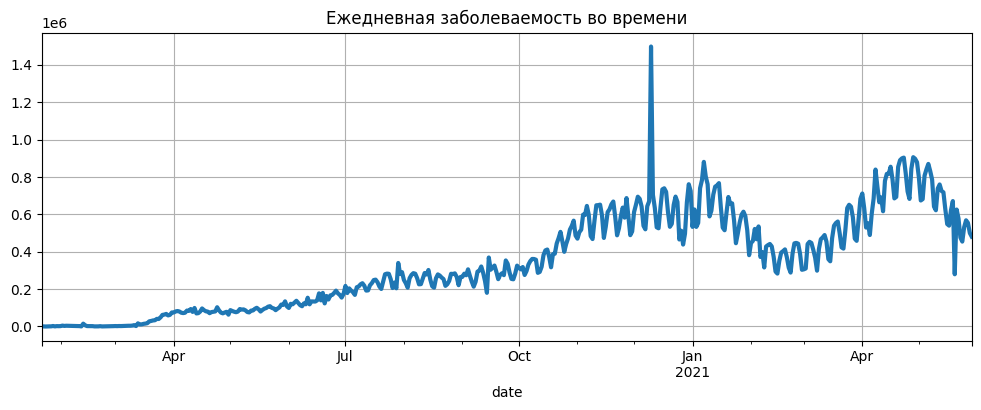

In [18]:
grouped_cases = covid_df.groupby("date")["daily_confirmed"].sum()
grouped_cases.plot(
    kind="line",
    figsize=(12, 4),
    title="Ежедневная заболеваемость во времени",
    grid=True,
    lw=3,
)


<div style="background-color: #e0ffd1;color: black;border: 3px solid black; padding: 15px; margin-right: 500px; width: 80%;">
<b>Примечание.</b> Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).
</div>


<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">
На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года — аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора. Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

- спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
- в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;
- минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

</div>

Теперь построим <b>гистограмму</b>, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

<Axes: ylabel='Frequency'>

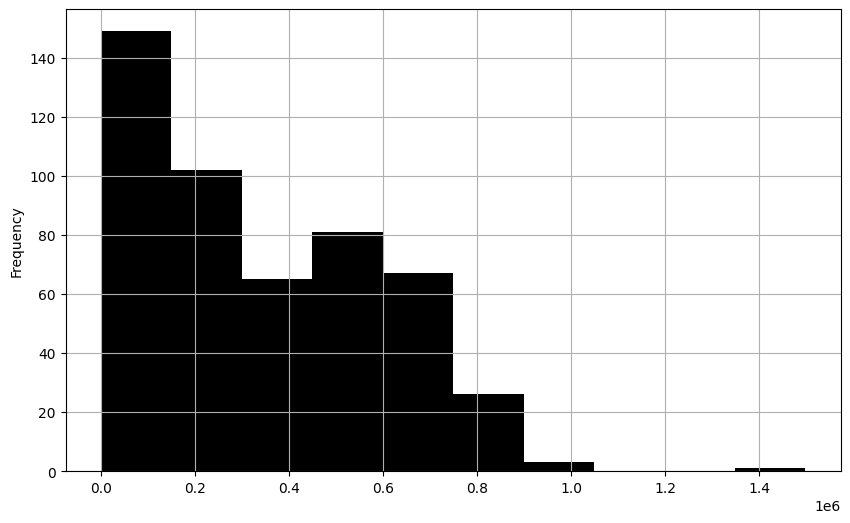

In [19]:
grouped_cases.plot(kind="hist", figsize=(10, 6), grid=True, color="black", bins=10)

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

1. Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
2. В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

</div>

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода <a href='https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.core.groupby.GroupBy.last.html'>last()</a> — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за <a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html">цветовую гамму графика</a>.

<Axes: xlabel='country'>

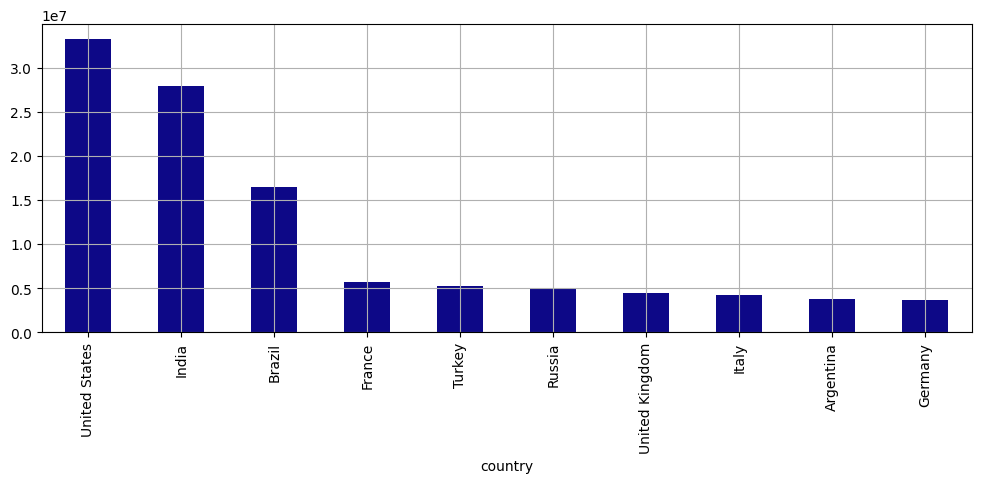

In [20]:
grouped_country = covid_df.groupby(["country"])["confirmed"].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(kind="bar", grid=True, figsize=(12, 4), colormap="plasma")

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.</div>

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

<Axes: xlabel='country'>

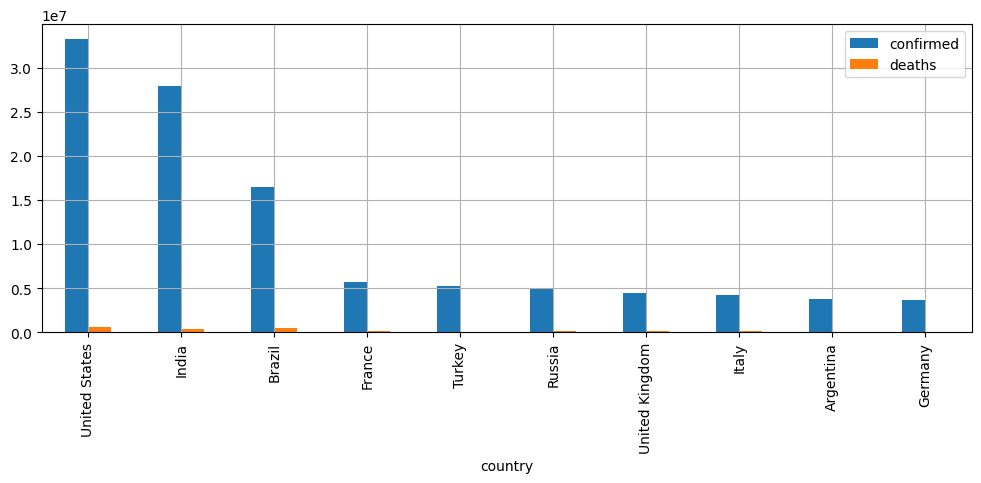

In [21]:
grouped_country = covid_df.groupby(["country"])[["confirmed", "deaths"]].last()
grouped_country = grouped_country.nlargest(10, columns=["confirmed"])
grouped_country.plot(kind="bar", grid=True, figsize=(12, 4))

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!
</div>

<Axes: xlabel='country'>

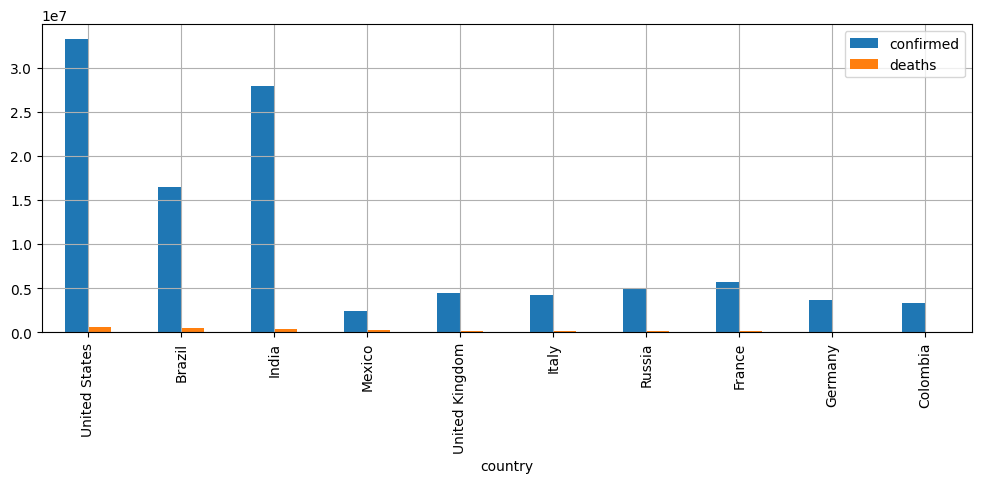

In [22]:
grouped_country = covid_df.groupby(["country"])[["confirmed", "deaths"]].last()
grouped_country = grouped_country.nlargest(10, columns=["deaths"])
grouped_country.plot(kind="bar", grid=True, figsize=(12, 4))

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

- С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.
- Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.
-Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.
- Отсутствует 3D-визуализация.

</div>

<Axes: xlabel='country'>

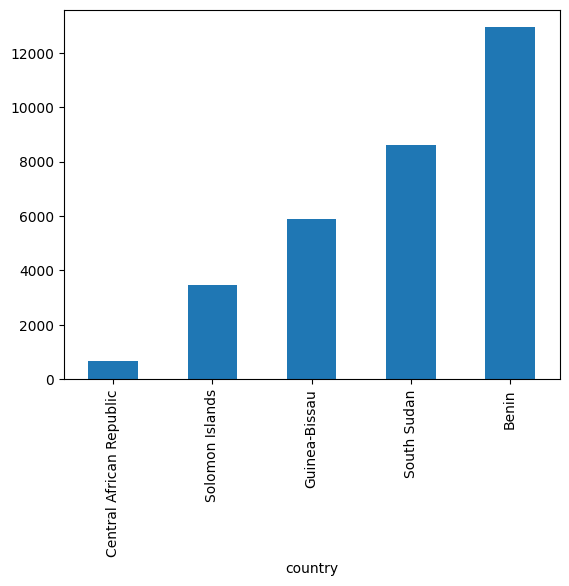

In [23]:
covid_df.groupby(["country"])["total_vaccinations"].last().nsmallest(5).plot(kind="bar")